In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


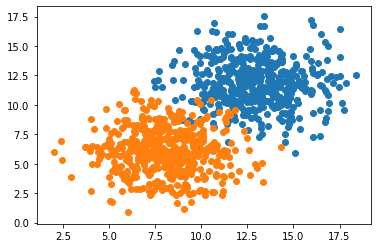

In [5]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [6]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=0, batch_size=50, epochs=500, shuffle='true')

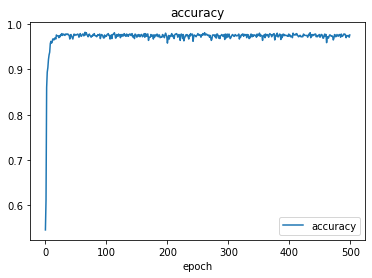

In [7]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

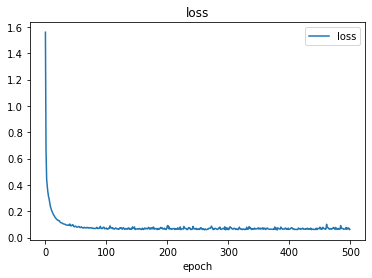

In [8]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [9]:
def plot_decision_boundary(X, y, model):
    x_span=np.linspace(min(X[:,0])-1, max(X[:, 0])+1, 50)
    y_span=np.linspace(min(X[:,1])-1, max(X[:, 1])+1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
#     plt.contour(xx, yy, z)

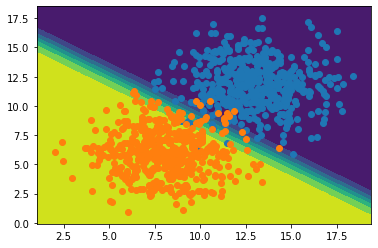

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prdiction is :  [[0.9999856]]


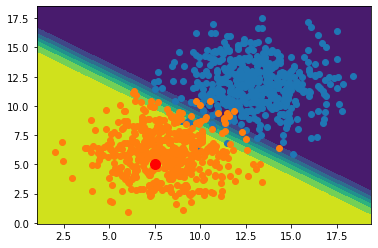

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker="o", markersize=10, color = "red")
print("Prdiction is : ",prediction)